In [291]:
from svg import *

In [292]:
delete_module('svg')
from svg import *

In [293]:
# read the data
adata = ad.read_h5ad("E9.5_E1S1.MOSTA.h5ad")
adata.shape

(5913, 25568)

In [294]:
# perform preprocessing
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=1500)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
adata.shape

(5631, 20055)

In [295]:
# calculate spatial neighbours
calcuate_spatial_neighbours(adata, n_neighbours=1000, method='gauss')

In [296]:
# calculate Moran's  I and obtain ranks
morans_results, morans_ranks, morans_svgs = calculate_morans_i_and_ranks(adata)

In [297]:
# calculate Geary's C and obtain ranks
gearys_results, gearys_ranks, gearys_svgs = calculate_gearys_c_and_ranks(adata)

In [300]:
# perform spaGFT and calculate ranks and SVGs
# spagft_gene_df, spagft_svg_list, spagft_svg_ranks = spa_gft(adata)

In [299]:
# read the results previously calculated results of SpaGFT algorithm
spagft_svg_ranks = pd.read_csv('spagft_svg_ranks.csv', index_col='gene_short_name')
file_path = 'spagft_svg_list.txt'
file = open(file_path, 'r')
file_contents = file.read()
file.close()
spagft_svg_list = file_contents.split()

In [302]:
gene_ranks_combined = combine_results([morans_ranks, gearys_ranks], [0.8, 0.2])

In [319]:
combined_svgs = gene_ranks_combined.sort_values()[0:len(morans_svgs)]

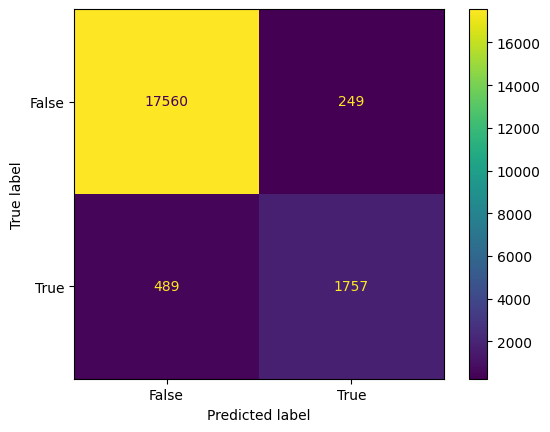

F1 score: 0.826
AUC: 0.884


In [309]:
# generate report and draw confusion matrix
cm, f1, auc = report1(adata, spagft_svg_list, morans_svgs)
print(f"F1 score: {f1.round(3)}")
print(f"AUC: {auc.round(3)}")

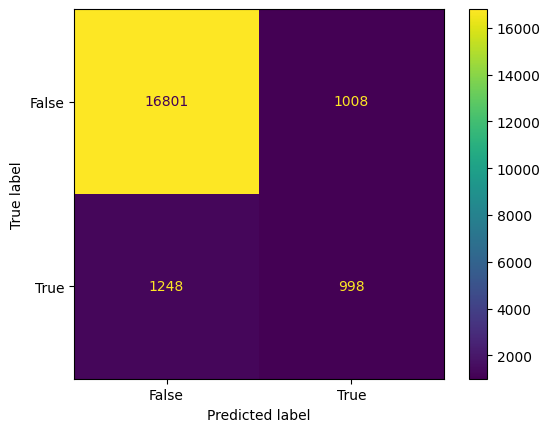

F1 score: 0.469
AUC: 0.694


In [311]:
# generate report and draw confusion matrix
cm, f1, auc = report1(adata, spagft_svg_list, gearys_svgs)
print(f"F1 score: {f1.round(3)}")
print(f"AUC: {auc.round(3)}")

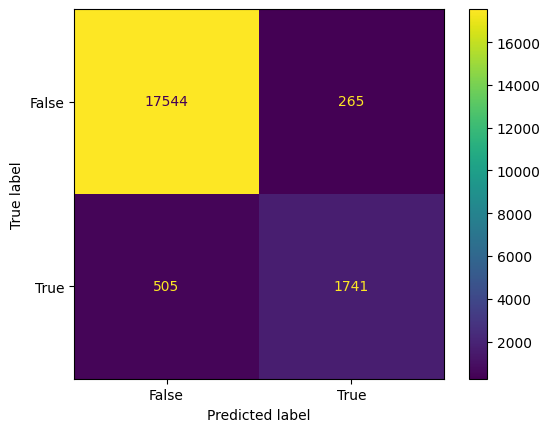

F1 score: 0.819
AUC: 0.88


In [320]:
# generate report and draw confusion matrix
cm, f1, auc = report1(adata, spagft_svg_list, combined_svgs)
print(f"F1 score: {f1.round(3)}")
print(f"AUC: {auc.round(3)}")

In [324]:
# Calculate Spearman's rank correlation coefficient
correlation, p_value = rank_correlation(spagft_svg_ranks, morans_ranks)
print("Spearman's rank correlation coefficient for Moran's scores:", correlation.round(3))
print("p-value:", p_value.round(3))

Spearman's rank correlation coefficient for Moran's scores: 0.901
p-value: 0.0


In [325]:
# Calculate Spearman's rank correlation coefficient
correlation, p_value = rank_correlation(spagft_svg_ranks, gearys_ranks)
print("Spearman's rank correlation coefficient for Geary's scores:", correlation.round(3))
print("p-value:", p_value.round(3))

Spearman's rank correlation coefficient for Geary's scores: 0.327
p-value: 0.0


In [326]:
# Calculate Spearman's rank correlation coefficient
correlation, p_value = rank_correlation(spagft_svg_ranks, gene_ranks_combined)
print("Spearman's rank correlation coefficient for combined scores:", correlation.round(3))
print("p-value:", p_value.round(3))

Spearman's rank correlation coefficient for combined scores: 0.906
p-value: 0.0


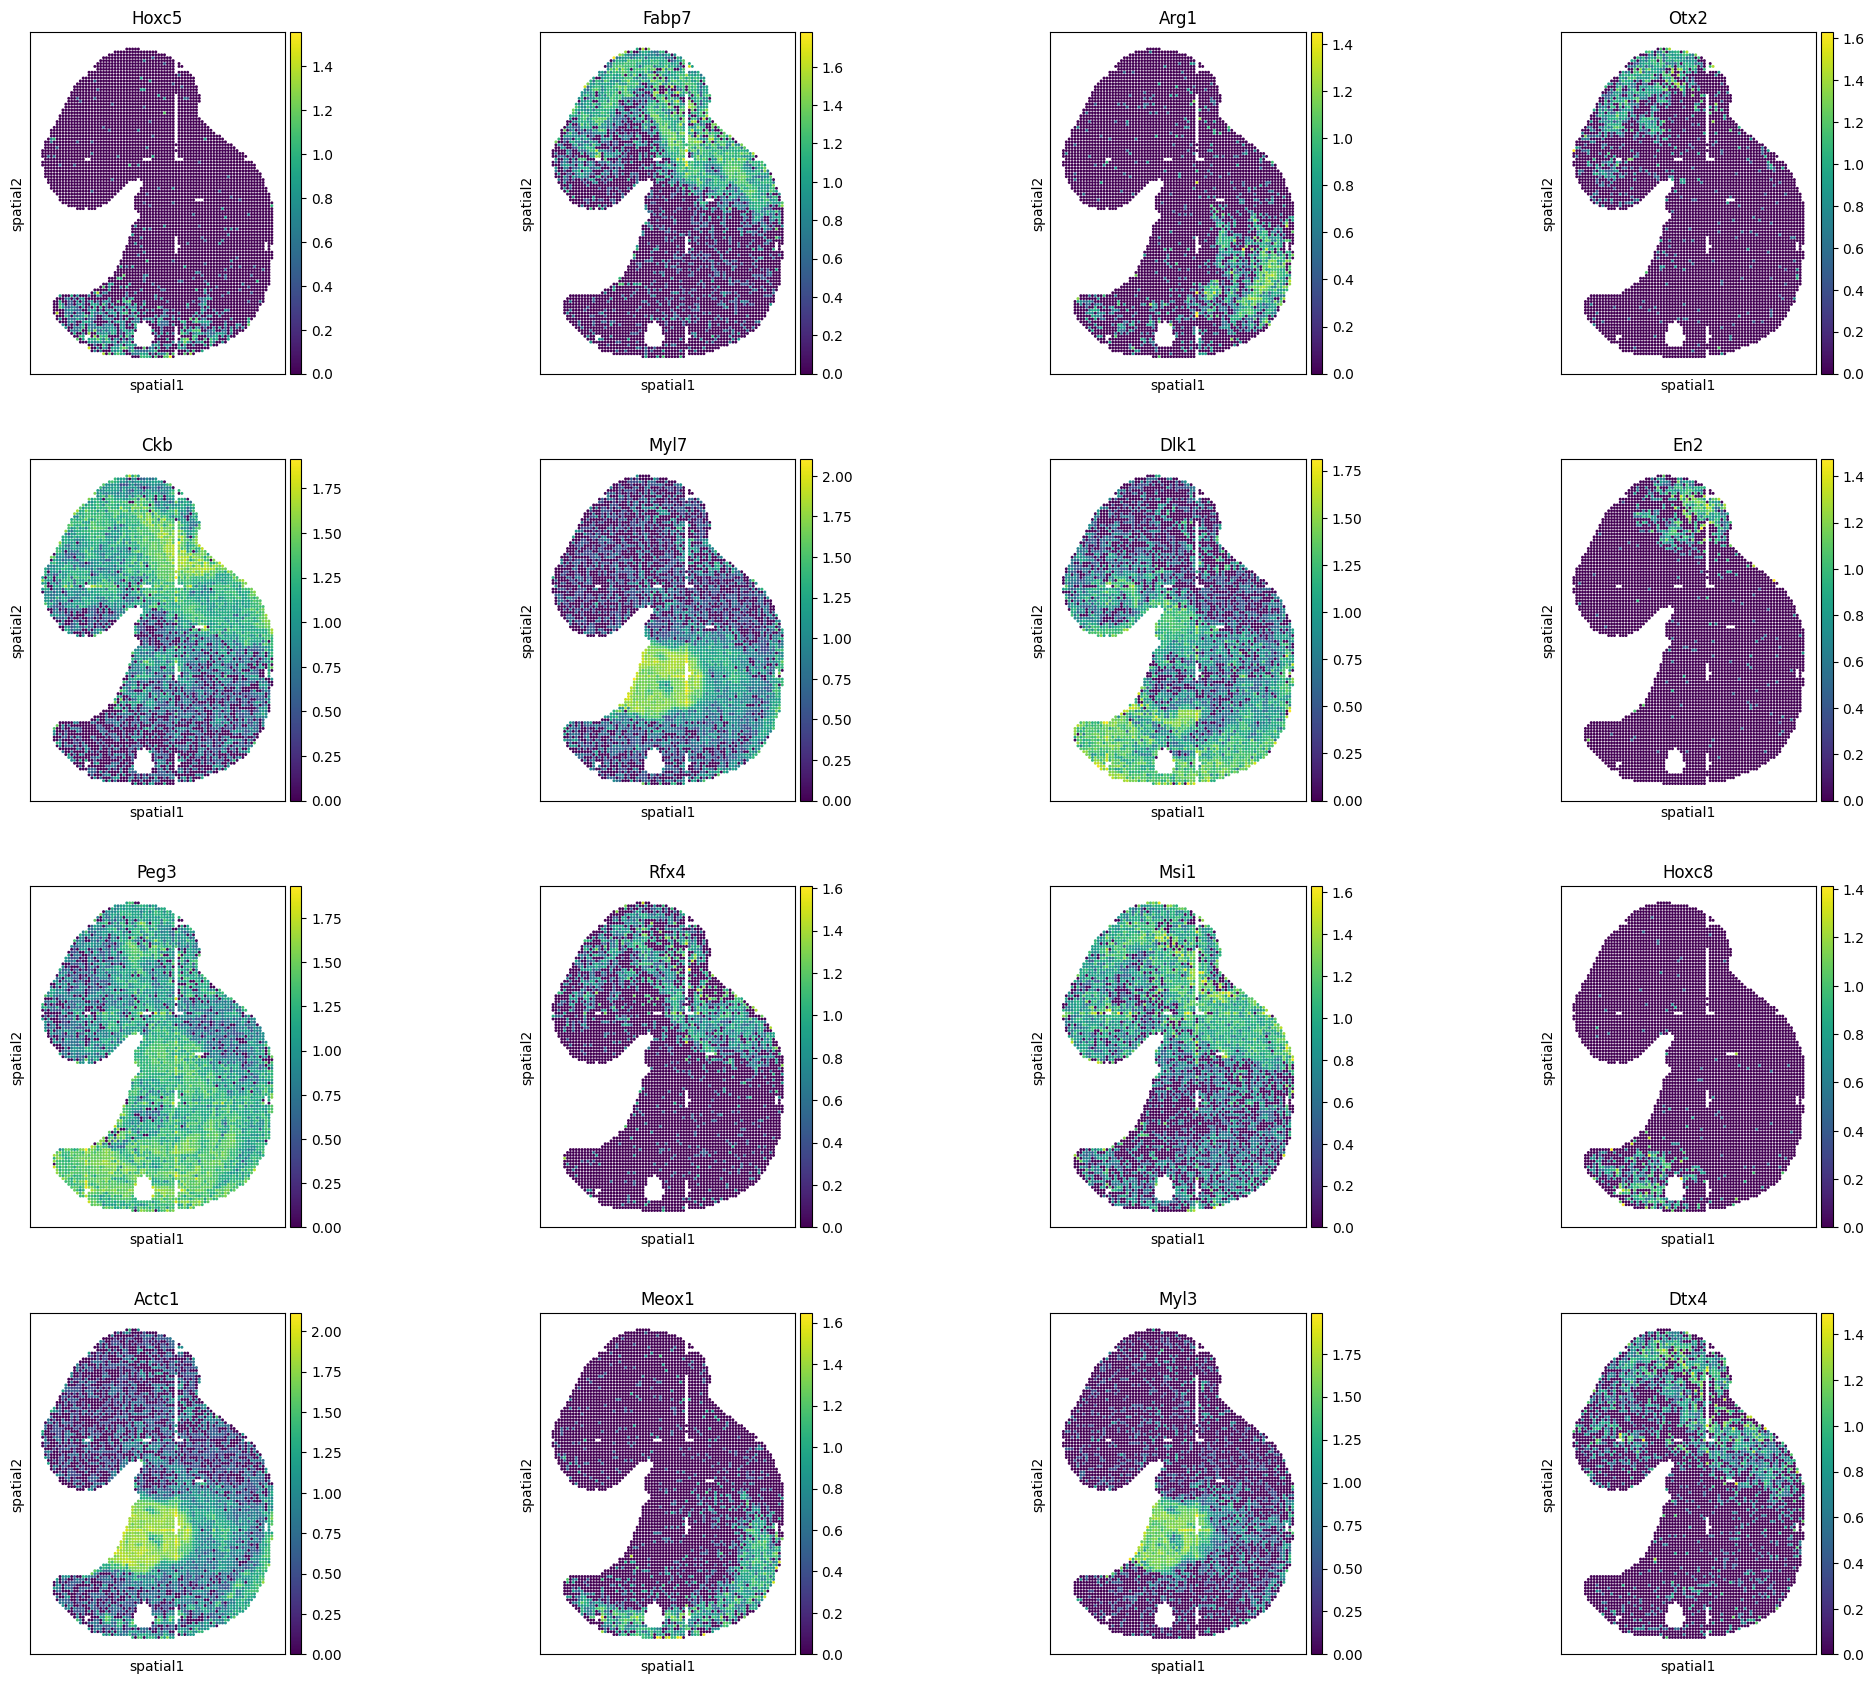

In [255]:
visualize_scanpy(adata, spagft_svg_list[0:16])

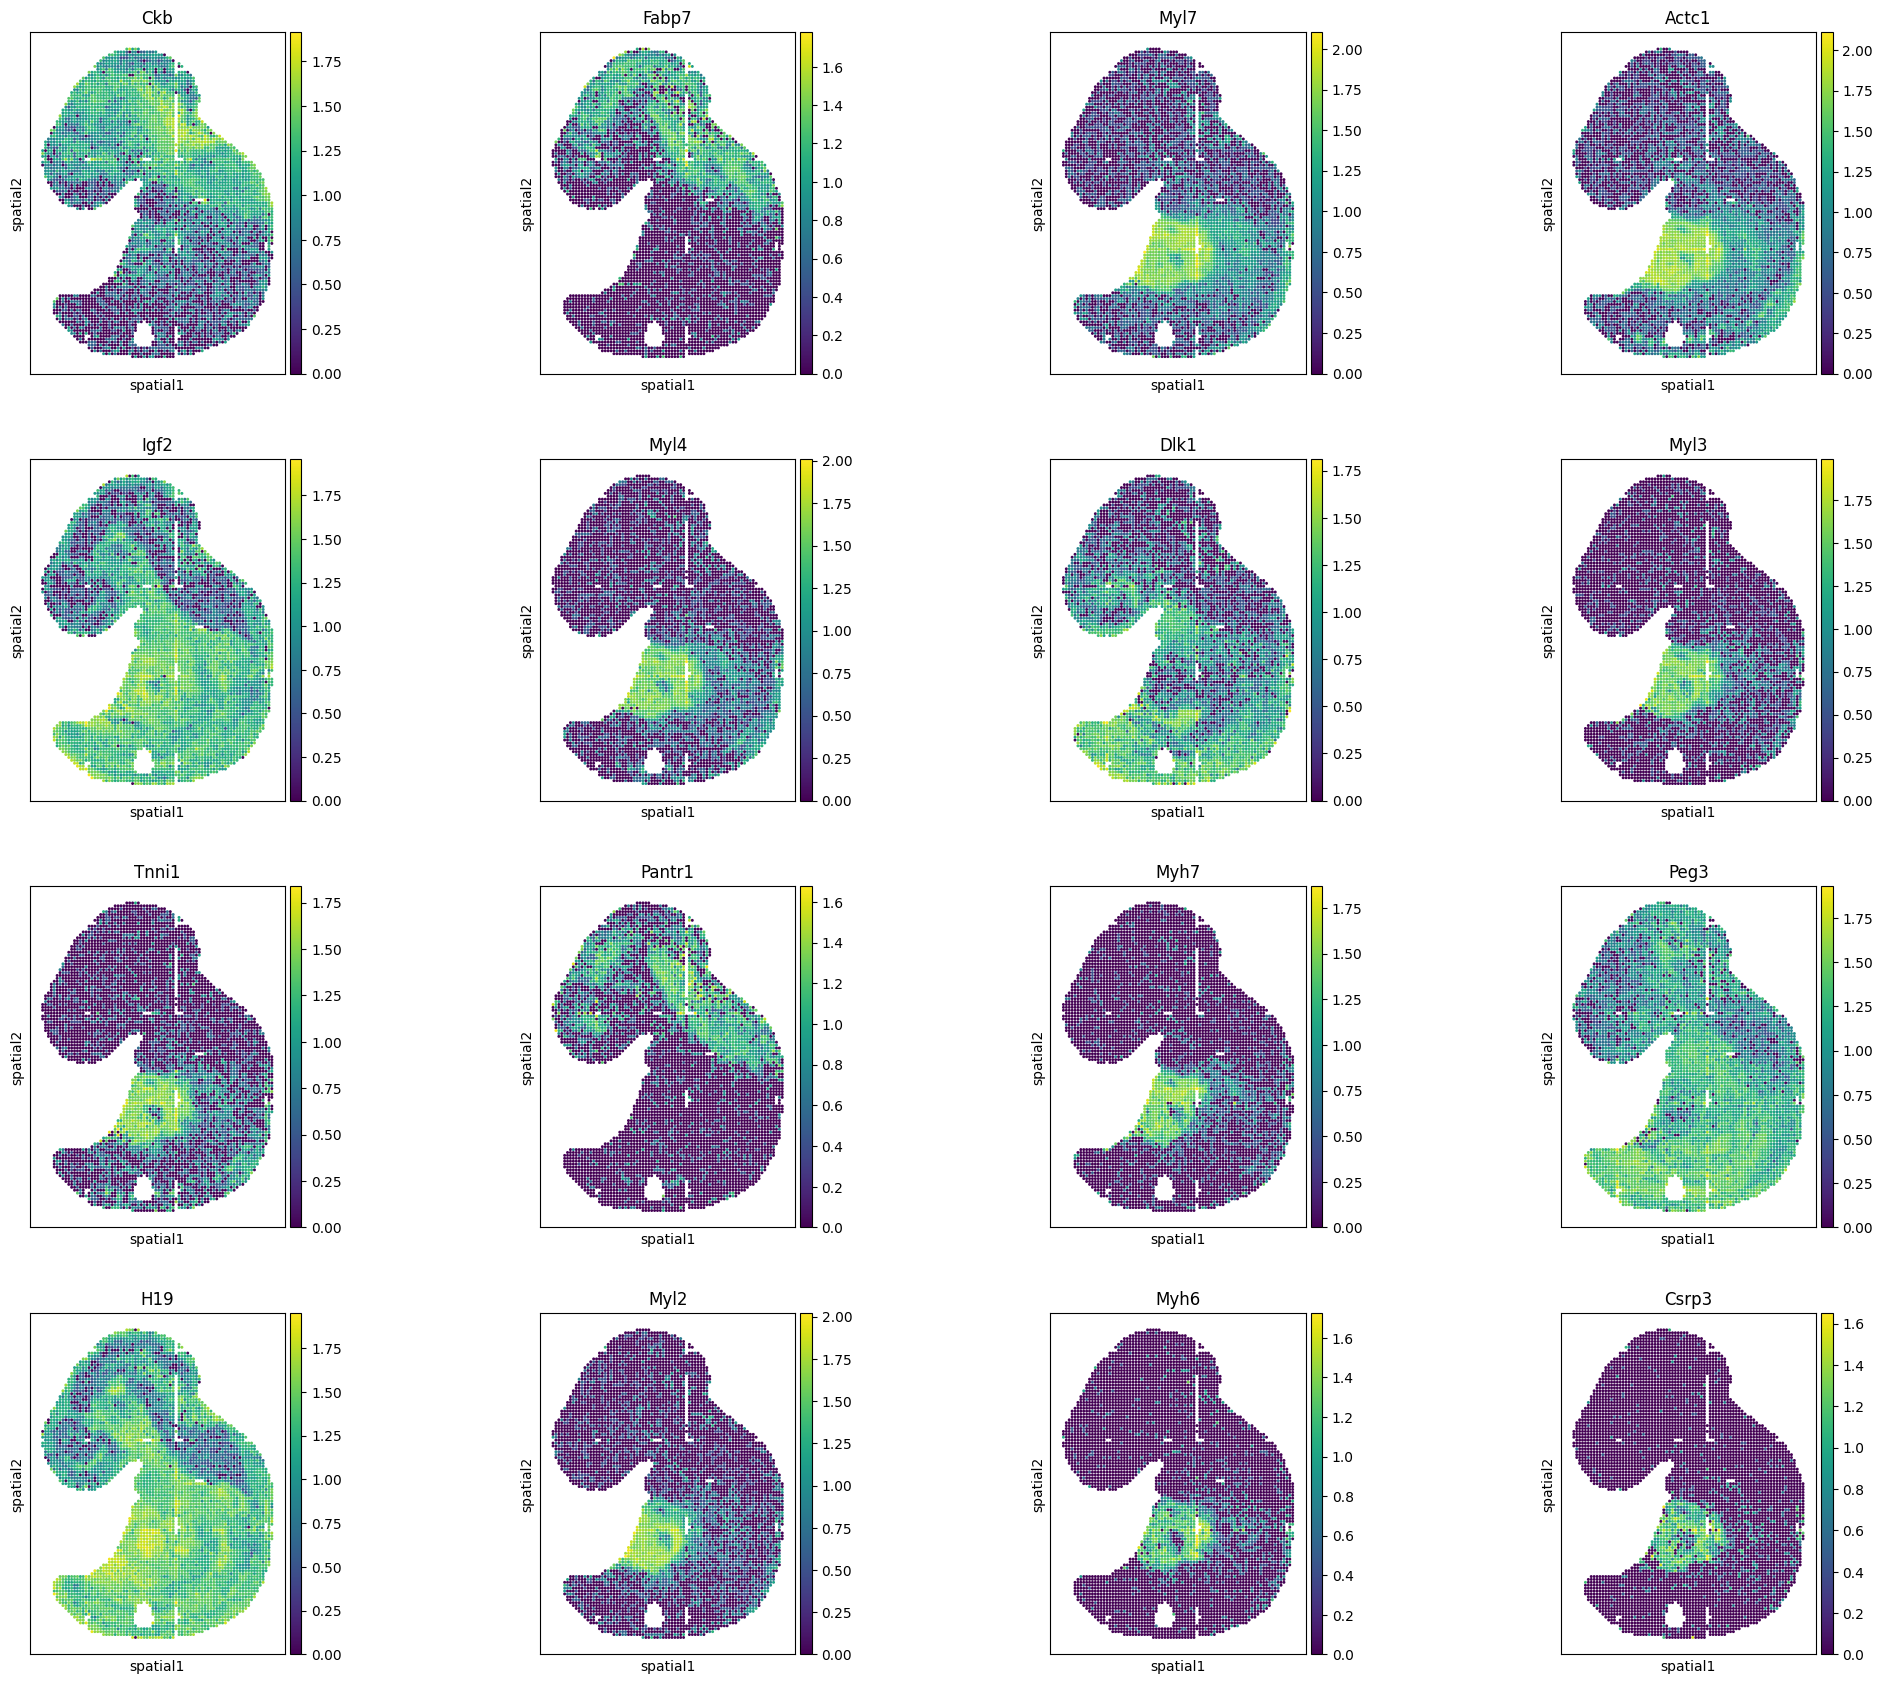

In [336]:
visualize_scanpy(adata, morans_ranks.sort_values()[0:16].index)

In [335]:
top_10_different = most_different_genes(spagft_svg_ranks.svg_rank, morans_ranks, 10)
top_10_different

Index(['Gm47415', 'Oosp1', 'Gm48935', '6430710C18Rik', 'Gm5106',
       '4732463B04Rik', 'Lpar5', 'Atxn7l1os1', 'Gm34368', 'G730013B05Rik'],
      dtype='object', name='gene_short_name')

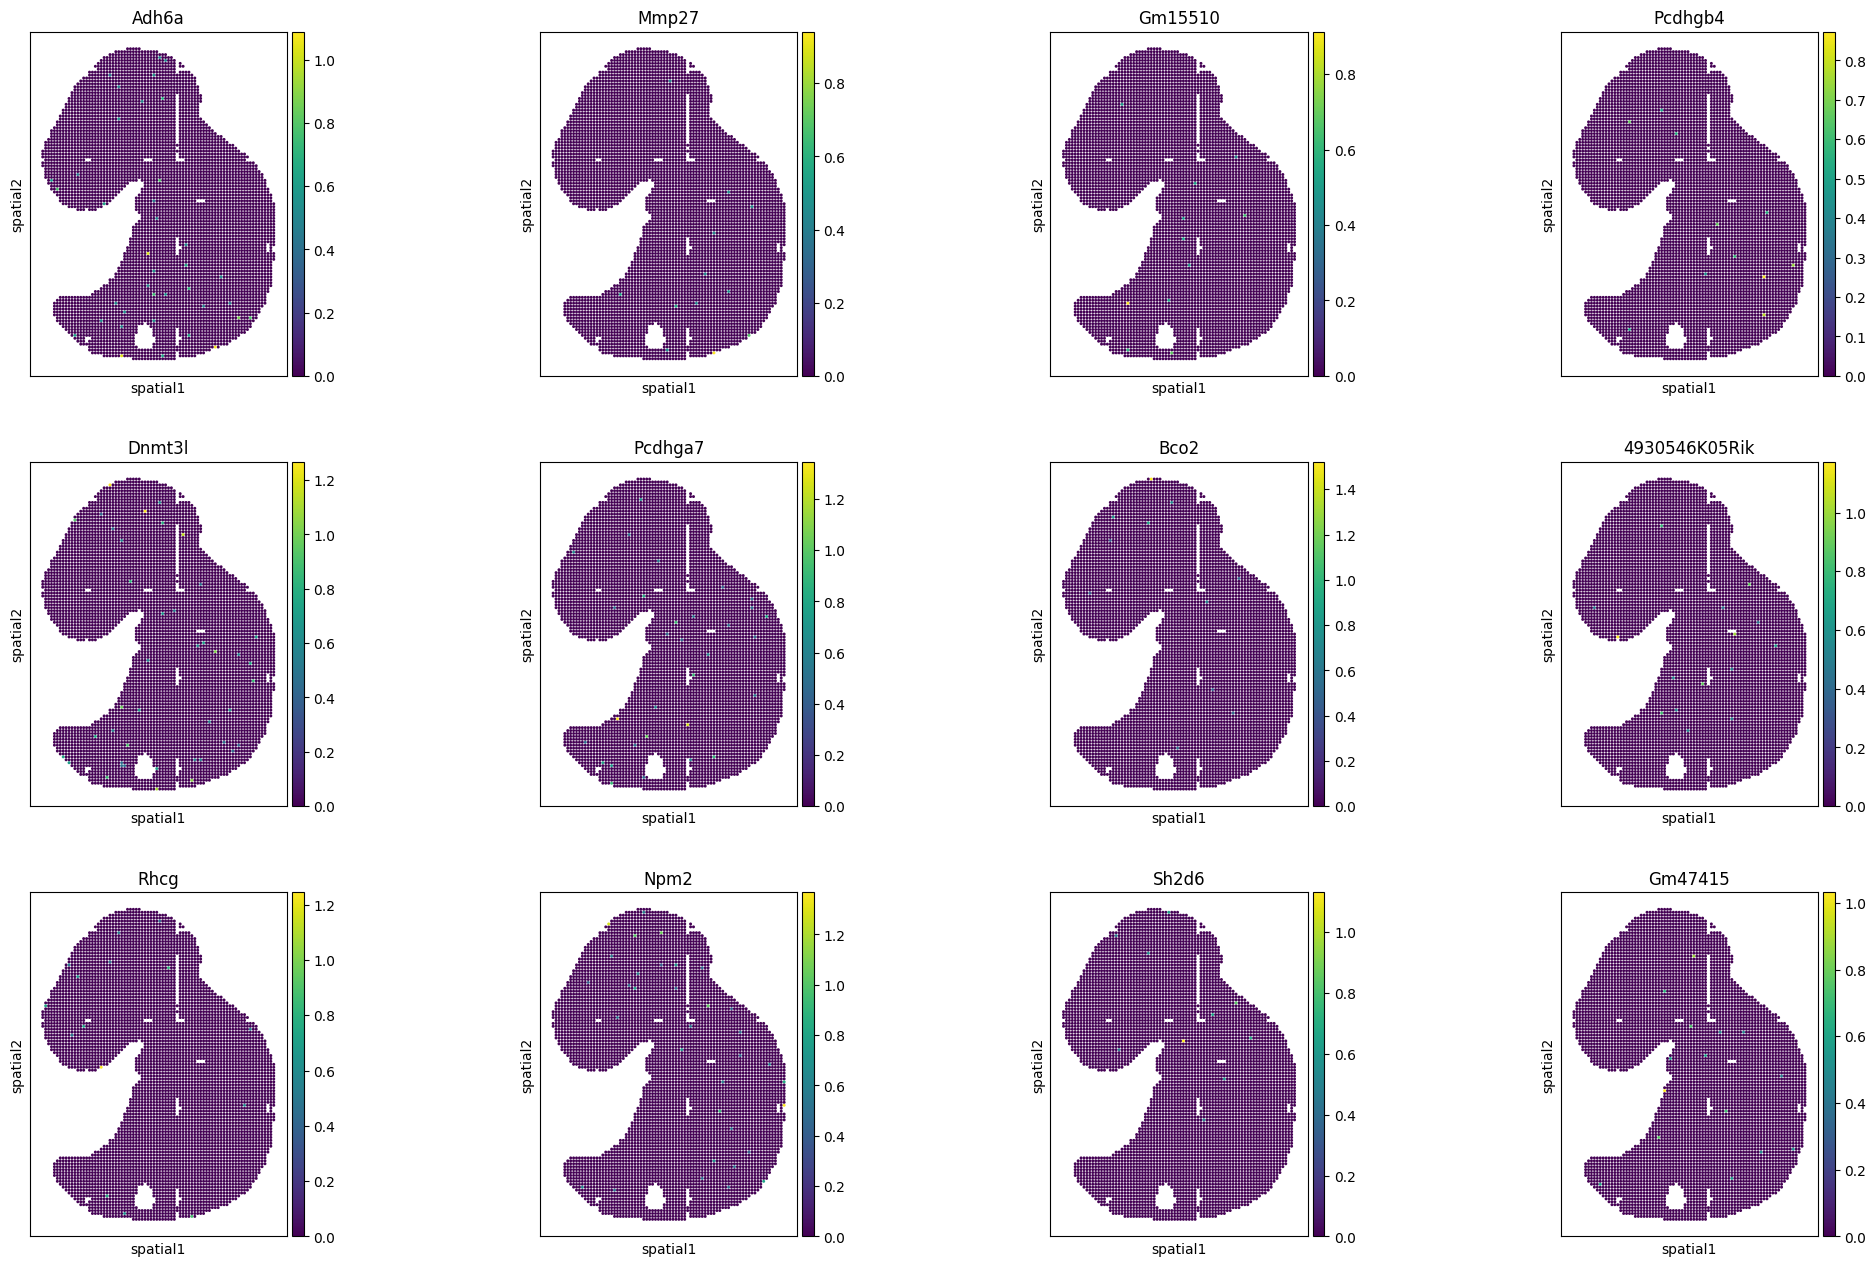

In [334]:
visualize_scanpy(adata, top_10_different)